## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?


In [10]:
zoo = pd.read_csv('/Users/gracesaunders/Documents/GitHub/knn/data/zoo.csv')
zoo.head()


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
classes = sorted(zoo['class'].unique())

for label in classes:
    class_animals = zoo.loc[zoo['class'] == label, 'animal'].tolist()
    print(f"\nClass {label} contains {len(class_animals)} animals:")
    print(", ".join(class_animals))

# the class sizes vary from 4 to 41 animals


Class 1 contains 41 animals:
aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf

Class 2 contains 20 animals:
chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

Class 3 contains 5 animals:
pitviper, seasnake, slowworm, tortoise, tuatara

Class 4 contains 13 animals:
bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna

Class 5 contains 4 animals:
frog, frog, newt, toad

Class 6 contains 8 animals:
flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

Class 7 contains 10 animals:
clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm


In [ ]:
for feat in zoo.columns[1:-1]: # skip the first column, which is the animal name, and the last column, which is the class
    print(zoo[feat].value_counts())
# all the variables except for animal name, class, and number of legs are binary

hair
0    58
1    43
Name: count, dtype: int64
feathers
0    81
1    20
Name: count, dtype: int64
eggs
1    59
0    42
Name: count, dtype: int64
milk
0    60
1    41
Name: count, dtype: int64
airborne
0    77
1    24
Name: count, dtype: int64
aquatic
0    65
1    36
Name: count, dtype: int64
predator
1    56
0    45
Name: count, dtype: int64
toothed
1    61
0    40
Name: count, dtype: int64
backbone
1    83
0    18
Name: count, dtype: int64
breathes
1    80
0    21
Name: count, dtype: int64
venomous
0    93
1     8
Name: count, dtype: int64
fins
0    84
1    17
Name: count, dtype: int64
legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64
tail
1    75
0    26
Name: count, dtype: int64
domestic
0    88
1    13
Name: count, dtype: int64
catsize
0    57
1    44
Name: count, dtype: int64


In [51]:
for feat in zoo.columns[1:-1]:
    print(zoo.loc[:,[feat,'class']].groupby('class').describe())

# features with whole number means for all/most classes will be useful for classification
# i.e. feathers, milk, backbone, breathes, fins
# and features with means that approach 0 or 1 for certain classes will also be useful
# i.e. hair, eggs, airborne, aquatic, toothed, tail
# features with means that are close to 0.5 or similar between many classes or will not be as useful
# i.e. predator, venomous, domestic, catsize
# legs will be useful for classification, particularly where the mean is a whole number 
# classes 2, 4, 5, and 6


       hair                                            
      count     mean       std  min  25%  50%  75%  max
class                                                  
1      41.0  0.95122  0.218085  0.0  1.0  1.0  1.0  1.0
2      20.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0
3       5.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0
4      13.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0
5       4.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0
6       8.0  0.50000  0.534522  0.0  0.0  0.5  1.0  1.0
7      10.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0
      feathers                                   
         count mean  std  min  25%  50%  75%  max
class                                            
1         41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2         20.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
3          5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4         13.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5          4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6          8.0  0.0  0.0  0.0  0.0  0.0 

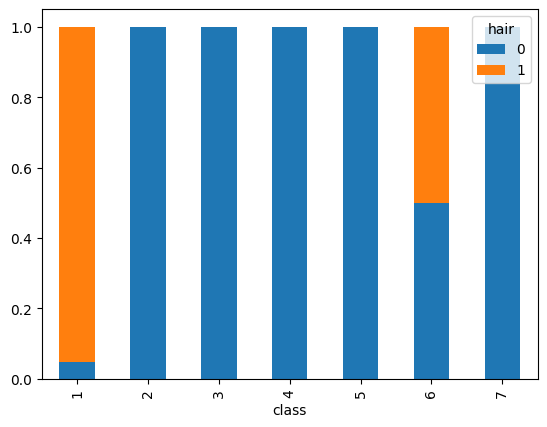

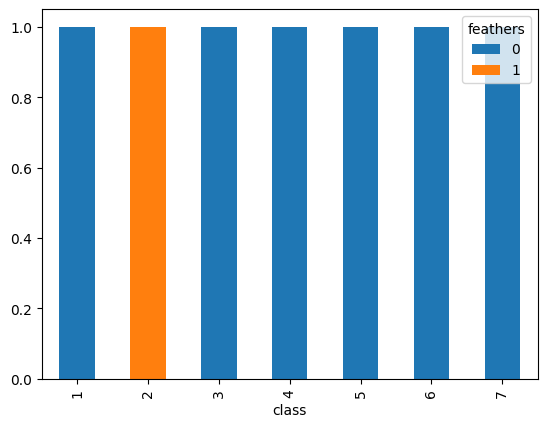

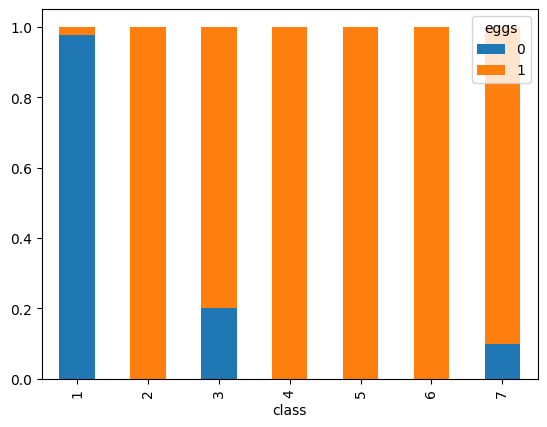

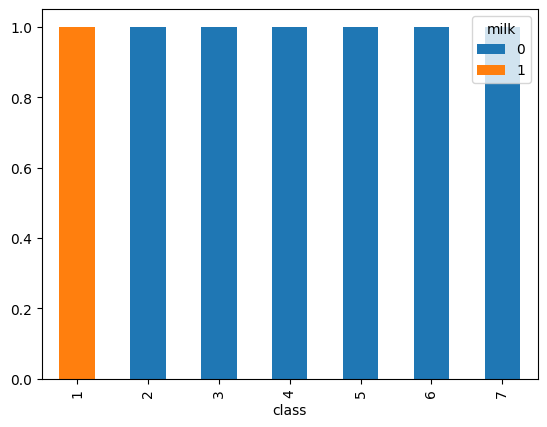

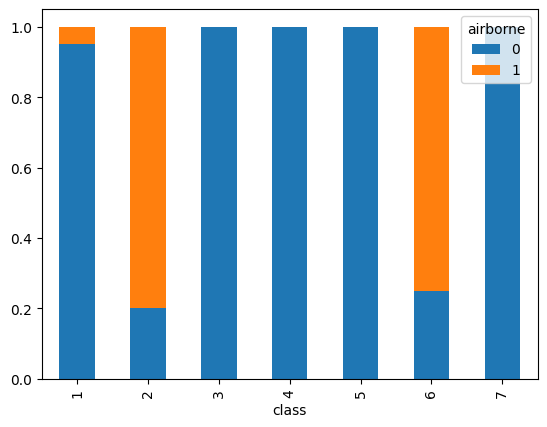

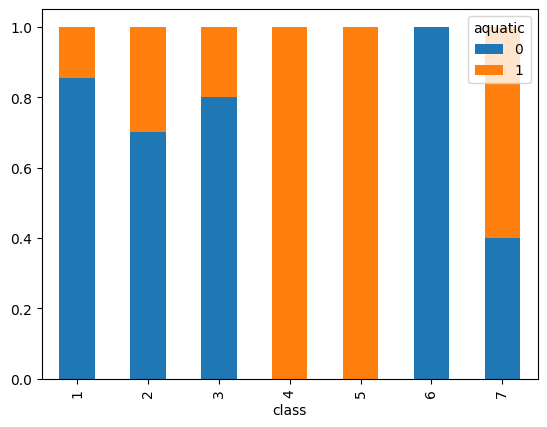

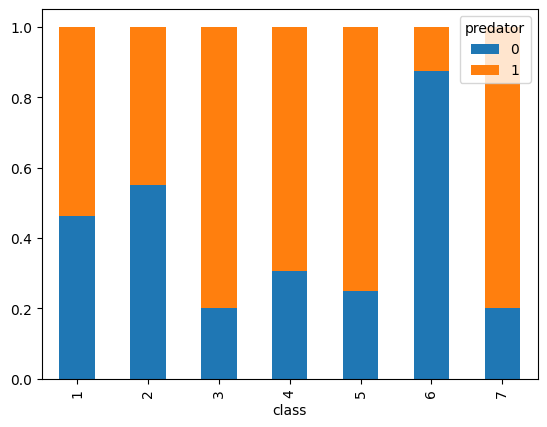

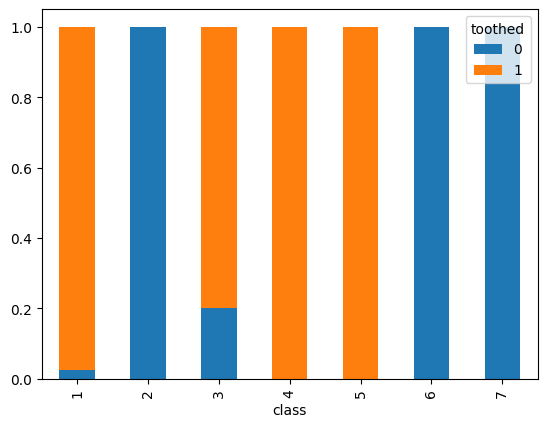

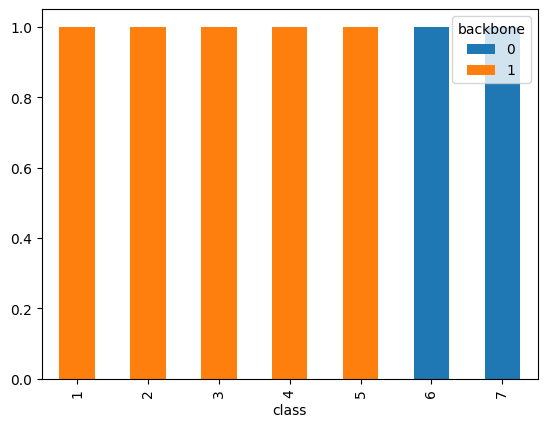

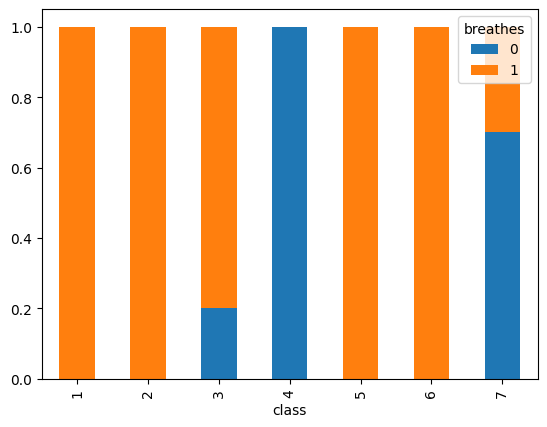

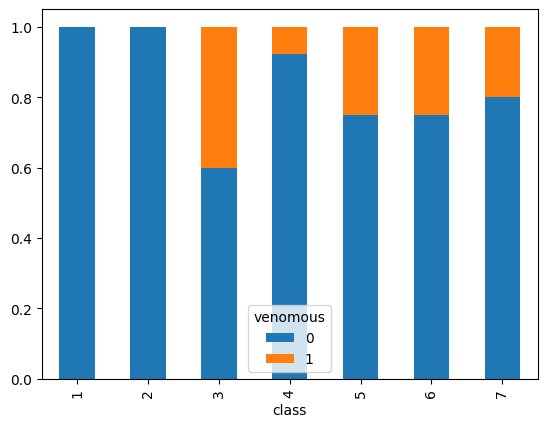

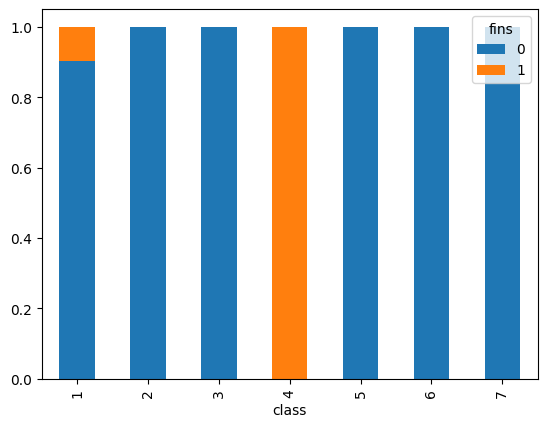

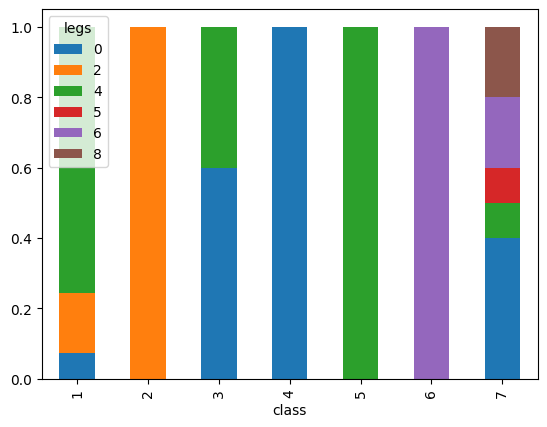

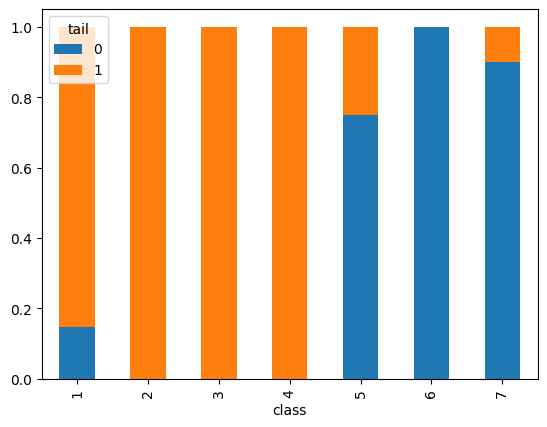

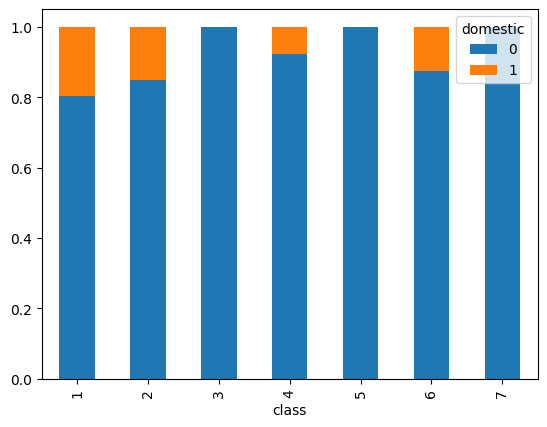

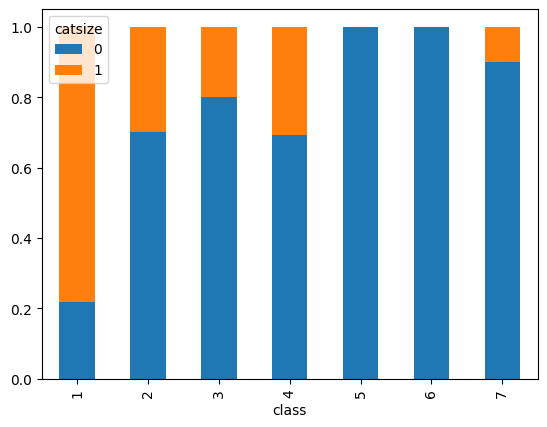

In [ ]:
for feat in zoo.columns[1:-1]:
    curr = pd.crosstab(zoo['class'], zoo[feat], normalize='index')
    curr.plot(kind='bar', stacked=True)
# these plots show the distribution of each feature by class as a percentage of the total number of animals in that class
# the features that will be the most informative for classification are the ones that have the most variation between classes
# and the least variation within classes 
# since most of the features are binary, the ones that are most informative will be the ones that are closest to 100% or 0% for certain classes
# for example, the feature 'feathers' is very informative because it is 100% for class 2 and 0% for all other classes, which makes sense 
# because birds are the only animals with feathers, and feathers is a defining characteristic of birds
# same for milk, where mammals are the only animals with milk so it is 100% for class 1 and 0% for all other classes


2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

## Select data:
y = zoo['class'] # Target variable
X = zoo.drop(columns=['class', 'animal']) # Create feature matrix including everything except the target variable and animal name
X = X.apply(maxmin) # Normalize X
# split the data into training and test sets using sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 50 train/50 test
                                                    random_state=100) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.


In [ ]:
## Solve for k that maximizes accuracy, using modified code from kNN.ipynb:
k_bar = N_test # Number of k's to try (length of test set)
Acc = [] # We'll store the accuracy here 

for k in range(1, k_bar):
    model = KNeighborsClassifier(n_neighbors=k) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc.append( np.sum( y_hat == y_test )/N_test ) # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k
print(k_star) # I was surprised that the optimal value of k was 1, 
# but I suppose it makes sense because the classes are fairly distinct with respect to certain features?
# and with all the features included, the model is able to classify the animals based only on the single nearest neighbor

[1]


In [72]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?


In [73]:
pd.crosstab(y_test,y_hat)
# the model is 100% accurate for all classes except for 4, where it misclassifies 1 animal as class 3
# this is likely because class 3 and class 4 are fish and reptiles, so they share many features in common

col_0,1,2,3,4,5,6,7
class,,,,,,,
1,23,0,0,0,0,0,0
2,0,12,0,0,0,0,0
3,0,0,2,1,0,0,0
4,0,0,0,3,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,0,2


5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [75]:
X2 = zoo.loc[:,['milk','aquatic', 'airborne']]
X2 = X2.apply(maxmin) # Normalize X

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X2,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 50 train/50 test
                                                    random_state=100) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

In [79]:
k_bar = N_test # Number of k's to try (length of test set)
Acc = [] # We'll store the accuracy here 

for k in range(1, k_bar):
    model = KNeighborsClassifier(n_neighbors=k) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc.append( np.sum( y_hat == y_test )/N_test ) # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k
print(k_star) # the optimal values of k increased, which makes sense because we are using fewer features so we'd want to use more neighbors to make classifications

[2 4 5 6]


In [80]:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

In [81]:
pd.crosstab(y_test,y_hat) # confusion table only prints some classes

col_0,1,2,4
class,,,
1,23,0,0
2,0,12,0
3,0,2,1
4,0,0,3
5,0,0,3
6,0,5,0
7,0,0,2


In [87]:
proba = model.predict_proba(X_test.values)
print(proba)

[[0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.

In [88]:
probabilities = pd.DataFrame(proba, columns=classes)
probabilities.describe()
# from this, we can see that the model is not very confident in its predictions, with the highest mean probability being less than 0.5
# this is likely because the model is using fewer features, so it is less certain about its predictions
# The mean of probabilities for class 3 and 5 (reptiles and amphibians) are zero, meaning the model will not predict these classes
# specifically for this second model, because of the features used (milk, aquatic, airborne) only aquatic could apply to classes 3 and 5
# but because both of those classes have very few observations, they are not as likely to be chosen as a nearest neighbor
# and because the other two features are never present in classes 3 and 5, the model cannot distinguish between 
# fish (class 4) vs. and reptiles and amphibians, and will always choose fish because of the significantly higher count of observations

,1,2,3,4,5,6,7
count,51.000000,51.000000,51.0,51.000000,51.0,51.000000,51.000000
mean,0.450980,0.215686,0.0,0.176471,0.0,0.117647,0.039216
std,0.502543,0.304219,0.0,0.385013,0.0,0.214202,0.135762
min,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,1.000000,0.500000,0.0,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,0.0,0.500000,0.500000


**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.


In [89]:
lm = pd.read_csv('/Users/gracesaunders/Documents/GitHub/knn/data/land_mines.csv')
lm.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [90]:
lm.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


Text(0.5, 1.0, 'Voltage vs. Height')

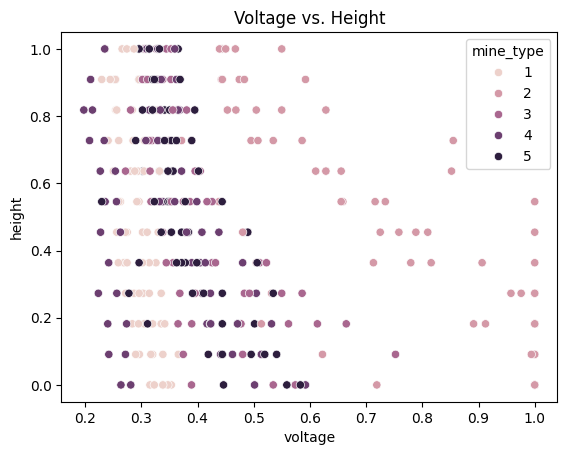

In [ ]:
vXh = sns.scatterplot(data=lm,x='voltage',y='height',hue='mine_type')
vXh.set_title('Voltage vs. Height')
# this shows that the only mine_type distinguished by voltage is type 2, which has a higher voltage than the other types regardless of height
# the other types have some patterning by voltage, but it is not as clear as for type 2

Text(0.5, 1.0, 'Soil vs. Height')

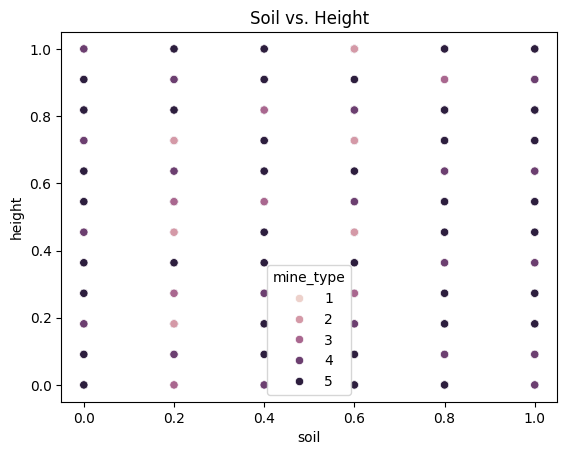

In [105]:
sXh = sns.scatterplot(data=lm,x='soil',y='height',hue='mine_type')
sXh.set_title('Soil vs. Height')

Text(0.5, 1.0, 'Soil vs. Voltage')

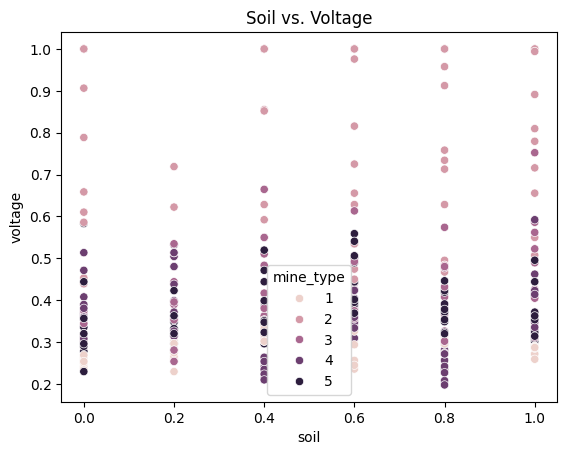

In [106]:
sXv = sns.scatterplot(data=lm,x='soil',y='voltage',hue='mine_type')
sXv.set_title('Soil vs. Voltage')

In [ ]:
pd.crosstab(lm['soil'],lm['mine_type'])
# it doesn't look like soil type will be particularly useful for distinguishing between different types of mines, 
# because the frequencies of each soil value are similar for all types of mines, and fairly evenly distributed, 
# except that 0.2 soil is about 50% less likely to be a type 5 mine

mine_type,1,2,3,4,5
soil,,,,,
0.0,12,12,12,11,12
0.2,12,10,11,11,7
0.4,12,12,10,11,11
0.6,12,12,10,11,12
0.8,12,12,12,10,12
1.0,11,12,11,12,11


In [ ]:
pd.crosstab(lm['height'],lm['mine_type'])
# height is also not very useful for distinguishing between different types of mines, because the frequencies of each height value 
# are similar for all types of mines, and fairly evenly distributed
# with the exception that a height of zero is about 50% less likely to be type 3,4, or 5 than 1 or 2 


mine_type,1,2,3,4,5
height,,,,,
0.000000,6,6,3,4,3
0.090909,6,6,4,6,5
0.181818,6,6,6,6,6
0.272727,6,6,6,5,5
0.363636,6,6,6,5,6
0.454545,6,6,6,6,5
0.545455,6,6,6,6,6
0.636364,6,6,6,6,6
0.727273,6,6,6,6,5


<Axes: xlabel='voltage', ylabel='Density'>

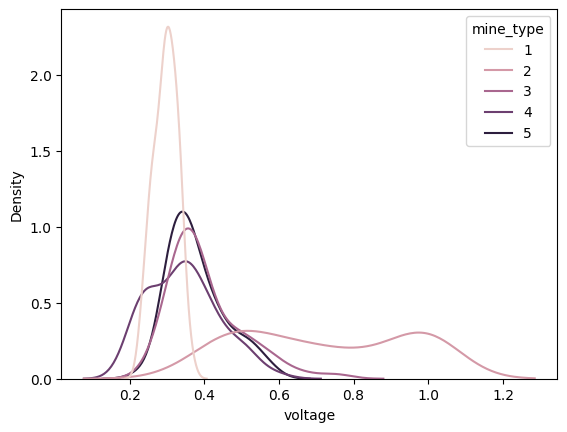

In [114]:
sns.kdeplot(data=lm, x='voltage', hue='mine_type')
# this shows that voltage is the most useful feature for distinguishing between different types of mines, since the distributions of voltage do vary by mine type

<Axes: xlabel='height', ylabel='Density'>

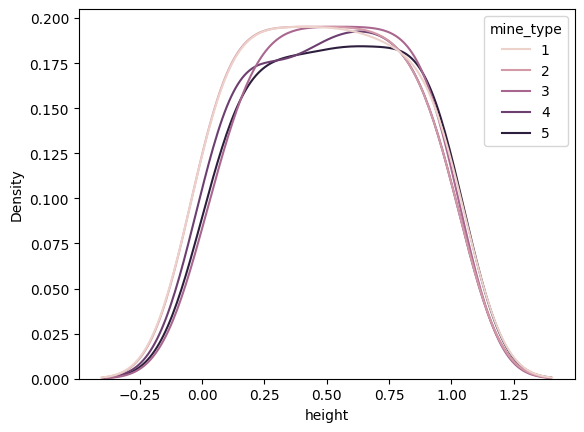

In [115]:
sns.kdeplot(data=lm, x='height', hue='mine_type')
# confirms the results from the crosstab and scatterplot above that height is not very useful for distinguishing between different types of mines

<Axes: xlabel='height', ylabel='Density'>

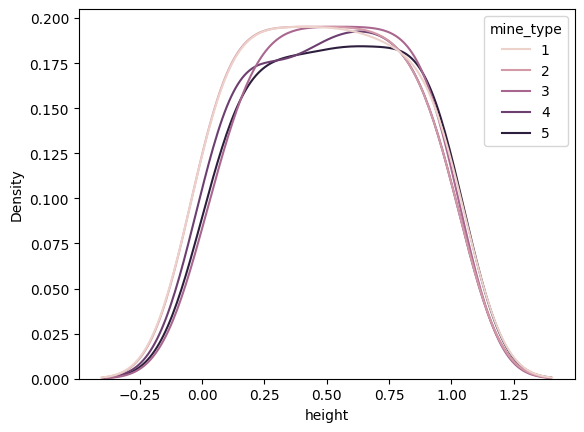

In [116]:
sns.kdeplot(data=lm, x='height', hue='mine_type')
# same as above

2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


In [117]:
## Select data:
y = lm['mine_type'] # Target variable
X = lm.loc[:,['height', 'voltage', 'soil']] # Create feature matrix including everything except the target variable and animal name
X = X.apply(maxmin) # Normalize X
# split the data into training and test sets using sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 50 train/50 test
                                                    random_state=100) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

3. Build a $k$-NN classifier. Explain how you select $k$.


In [118]:
k_bar = N_test # Number of k's to try (length of test set)
Acc = [] # We'll store the accuracy here 

for k in range(1, k_bar):
    model = KNeighborsClassifier(n_neighbors=k) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc.append( np.sum( y_hat == y_test )/N_test ) # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k
print(k_star) # the optimal value of k is 2

[2]


In [119]:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


In [120]:
pd.crosstab(y_test,y_hat)
# this model is definitely much less accurate than the zoo model, accuracy < 50% for all classes except for type 2
# it makes sense that it would be best at accurately identifying type 2 mines, because from the kde plots above, 
# we could see that it had the most distinct distribution for voltage (wider), the only effective identifying feature. 
# the other types of mines had more similar distributions for voltage (peaks at same location, despite differences in the height of the peaks)
# it's the least accurate for types 3 and 5, which had the most similar distribution for voltage

col_0,1,2,3,4,5
mine_type,,,,,
1,27,0,10,1,0
2,0,29,3,1,2
3,8,0,15,5,5
4,12,2,11,10,0
5,10,0,12,4,2


5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [ ]:
# This model is really only effective for positively identifying type 2 mines. This could be useful, since if they have higher voltages, they could be more dangerous
# but it's not as useful for distinguishing between the other types of mines, which could be equally dangerous, but have different voltages
# the model could be improved by adding more features that are more effective at distinguishing between the different types of mines,
# if it is possible to collect that data, since 2/3 variables provided in the dataset were not very useful for classification by type

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.